In [1]:
# Dependencies
import tweepy
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys. Place your keys here.
consumer_key = "jHszemnvaELuv5AhnQR4ZLdrA"
consumer_secret = "A4RjPlgzfPzwGuLloxjSglNRvpKz1UVf0QYdnEOn77966akdgD"
access_token = "706845518274699264-7rizpUwb9IUpLKnsE8hlUee1UvOraGF"
access_token_secret = "jT1cBzMTXcsy4lt7zLW8TUHi5kAX8r7BIX8uNc8bOGndo"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [18]:
# Target User Account
target_users = ["@CNBC","@CNNMoney", "@WSJ", "@YahooFinance", "@FinancialTimes"]

#Empty list to aggregate retrieved data for sentiments.
sentiment_time = []

for user in target_users:

# Lists for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

# A list to hold tweet timestamps
    tweet_times = []
    
#Added a counters to message the calling limitition set by Open Weather.
    counter = 0
    counter2 = 0

# Loop through 5 pages of tweets (total 100 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).pages(5):
        counter2 += 1
        #counter = 0

            # Get all tweets from home feed
#public_tweets = api.user_timeline(user)
        for status in page:
            tweet = json.dumps(status._json, indent=3)
            tweet = json.loads(tweet)
            text = tweet['text']
            raw_time = tweet["created_at"]
            tweet_times.append(raw_time)
            counter +=1

            converted_times = []
            for x in tweet_times:
                clean_time = datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y")
                converted_times.append(clean_time)             
            
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]
            pos = analyzer.polarity_scores(text)["pos"]
            neu = analyzer.polarity_scores(text)["neu"]
            neg = analyzer.polarity_scores(text)["neg"]
    
# Add each value to the appropriate array
            sentiment_time.append({"Tweeter": user,
                                  "Comp_Sent": compound,
                                  "Posi_Sent": pos,
                                  "Nuet_Sent": neu,
                                  "Nege_Sent": neg,
                                  "Time": clean_time,
                                  "Count": counter})
   

In [19]:
counter

100

In [ ]:
'''# Convert tweet timestamps to datetime objects that can be manipulated by Python
converted_times = []
    for x in tweet_times:
    clean_time = datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y")
    converted_times.append(clean_time)'''

In [20]:
# Convert dictionary into a dataframe.
sentiment_pd = pd.DataFrame(sentiment_time)
com = sentiment_pd["Comp_Sent"]
pos = sentiment_pd["Posi_Sent"]
neg = sentiment_pd["Nege_Sent"]
nue = sentiment_pd["Nuet_Sent"]
clean_time = sentiment_pd["Time"]
counter = sentiment_pd["Count"]

sentiment_pd.head()

,Comp_Sent,Count,Nege_Sent,Nuet_Sent,Posi_Sent,Time,Tweeter
0,0.0000,1,0.000,1.000,0.000,2018-03-22 23:00:58+00:00,@CNBC
1,-0.5809,2,0.321,0.546,0.134,2018-03-22 22:57:28+00:00,@CNBC
2,0.0000,3,0.000,1.000,0.000,2018-03-22 22:49:28+00:00,@CNBC
3,-0.1027,4,0.113,0.887,0.000,2018-03-22 22:49:11+00:00,@CNBC
4,0.4404,5,0.000,0.791,0.209,2018-03-22 22:43:02+00:00,@CNBC


In [21]:
# Save DF to a csv file.
sentiment_pd.to_csv('Senitment_On_Tweets.csv')

In [29]:
#Creating a Scatter Plot
plt.style.use('ggplot')
colors = {'@CNBC':'red', '@CNNMoney':'blue', '@YahooFinance':'green', '@WSJ':'black', '@FinancialTimes': 'yellow'}
fig, ax =plt.subplots()
my_scatter_plot = ax.scatter(counter, com, 
                             c=sentiment_pd['Tweeter'].apply(lambda x: colors[x]),
                             marker='o', alpha =.3, linewidth= .8)
plt.xlim(100,0)
plt.ylim(1.00, -1.00)
ax.set_xlabel("100 Recent Tweets per Network")
ax.set_ylabel("Total (Sentiment) Polarity")
ax.set_title("Business News Sentiment")
ax.legend(['@CNBC','@CNNMoney','@YahooFinance','@WSJ','@FinancialTimes'])

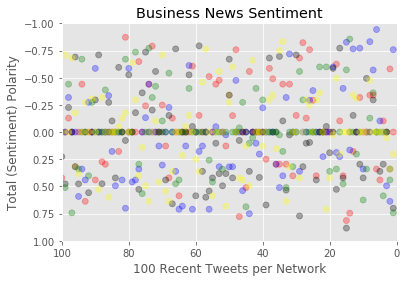

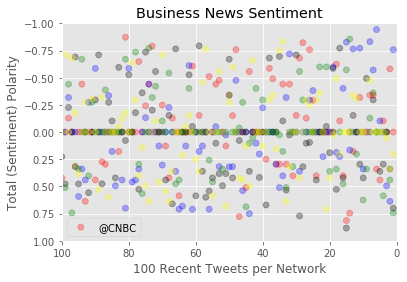

In [30]:
#Saving Plot
plt.savefig("Scatter.jpg")
plt.show()

In [ ]:
'''''#plt.xticks(rotation='vertical')
'''''